<a href="https://colab.research.google.com/github/tableClothed/ML-Projects/blob/master/ModelePredykcyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LINEAR REGRESSION - REGRESJA LINIOWA

Relacja między szybkością ładowania stron a ilością zakupów:

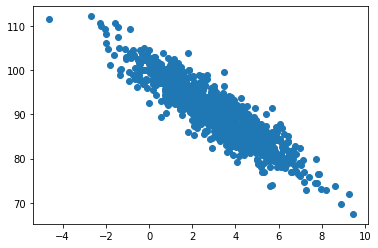

In [1]:
import numpy as np
from pylab import *

szybkosc_stron = np.random.normal(3.0, 2.0, 1000)
ilosc_zakupow = 100 - (szybkosc_stron + np.random.normal(0.1, 0.99, 1000)) * 3

scatter(szybkosc_stron, ilosc_zakupow)

In [0]:
from scipy import stats

nachylenie, pkt_przeciecia, r_wartosc, p_wartoc, std_error = stats.linregress(szybkosc_stron, ilosc_zakupow)

# r_wartosc - współczynnik korelacji
# p_wartosc - Dwustronna wartość p dla testu hipotez, którego hipotezą zerową jest to, że nachylenie wynosi zero,
# przy użyciu testu Walda z rozkładem t statystyki testowej.
# std_error - Błąd standardowy szacowanego gradientu.

In [3]:
r_wartosc ** 2

0.8101974064354897

Wykorzystajmy nachylenie i punkt przecięcia, jaki uzyskaliśmy z regresji, aby wykreślić przewidywane wartości vs. zaobserwowane

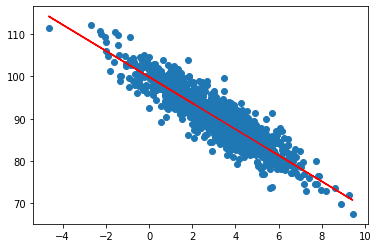

In [4]:
import matplotlib.pyplot as plt

def przewidz(x):
  return nachylenie * x + pkt_przeciecia

linia = przewidz(szybkosc_stron)

plt.scatter(szybkosc_stron, ilosc_zakupow)
plt.plot(szybkosc_stron, linia, c='r')
plt.show()

### POLYNOMIAL REGRESSION - REGRESJA WIELOMIANOWA

Co jeśli twoje dane wcale nie wyglądają liniowo? Spójrzmy na bardziej realistycznie wyglądające dane dotyczące prędkości / zakupu strony:

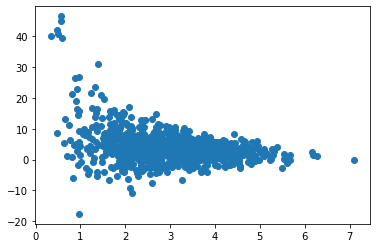

In [5]:
np.random.seed(2)

szybkosc_stron = np.random.normal(3.0, 1.0, 1000)
ilosc_zakupow = np.random.normal(10.0, 10.0, 1000) / szybkosc_stron

scatter(szybkosc_stron, ilosc_zakupow)

numpy ma przydatną funkcję polyfit, której możemy użyć, abyśmy mogli zbudować model wielomianowy naszych danych n-tego stopnia, który minimalizuje błąd kwadratu. Spróbujmy z wielomianem czwartego stopnia:

In [0]:
x = np.array(szybkosc_stron)
y = np.array(ilosc_zakupow)

p4 = np.poly1d(np.polyfit(x, y, 8))
# Klasa wygody, używana do enkapsulacji „naturalnych” operacji na
# wielomianach, aby wspomniane operacje mogły przybrać
# swoją zwykłą formę w kodzie.

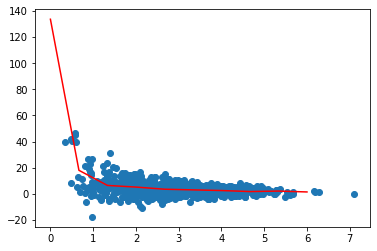

In [7]:
xp = np.linspace(0, 6, 10)
# linespace - zwraca równomiernie rozmieszczone liczby w określonym przedziale.
# 0 - start - wartość początkowa sekwencji
# 6 - stop - Wartość końcowa sekwencji, chyba że punkt końcowy jest ustawiony na False
# 10 - liczba próbek do wygenerowania. Domyślna wartość to 50. Musi być nieujemna

plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [8]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))
# R^2 (współczynnik determinacji) funkcja regresji wyniku.
# Najlepszy możliwy wynik to 1,0 i może być ujemny (ponieważ model
# może być arbitralnie gorszy). Stały model, który zawsze przewiduje
# oczekiwaną wartość y, bez względu na cechy wejściowe, uzyskałby
# wynik R ^ 2 wynoszący 0,0.

print(r2)

0.3027100392324025


#### REGRESJA WIELOKROTNA - MULTIPLE REGRESSION

In [0]:
import pandas as pd

df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

In [12]:
data = df[['Mileage', 'Price']]
data

,Mileage,Price
0,8221,17314.103129
1,9135,17542.036083
2,13196,16218.847862
3,16342,16336.913140
4,19832,16339.170324
...,...,...
799,16229,16507.070267
800,19095,16175.957604
801,20484,15731.132897
802,25979,15118.893228


In [15]:
pojemniki = np.arange(0, 50000, 10000) # tablica array(0, 10000, 20000, 30000, 40000, 50000)
grupy = data.groupby(pd.cut(data['Mileage'], pojemniki)).mean()
grupy

,Mileage,Price
Mileage,,
"(0, 10000]",5588.629630,24096.714451
"(10000, 20000]",15898.496183,21955.979607
"(20000, 30000]",24114.407104,20278.606252
"(30000, 40000]",33610.338710,19463.670267


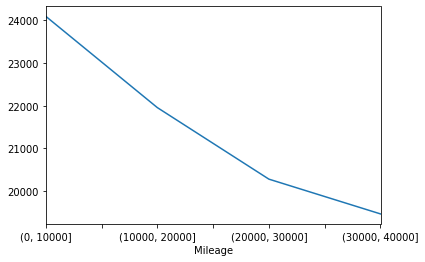

In [16]:
grupy['Price'].plot.line()

Możemy użyć pand, aby podzielić tę macierz na wektory cech, którymi jesteśmy zainteresowani, i wartość, którą próbujemy przewidzieć.

Zwróć uwagę, jak unikamy marki i modelu; regresje nie działają dobrze z wartościami porządkowymi, chyba że można je przekonwertować na jakiś porządek liczbowy, który w jakiś sposób ma sens.

Skalujmy nasze dane funkcji do tego samego zakresu, abyśmy mogli łatwo porównać współczynniki, z którymi w końcu otrzymamy.

In [17]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

x = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

x

,Mileage,Cylinder,Doors
0,8221,6,4
1,9135,6,4
2,13196,6,4
3,16342,6,4
4,19832,6,4
...,...,...,...
799,16229,6,4
800,19095,6,4
801,20484,6,4
802,25979,6,4


In [26]:
skala = StandardScaler()

x[['Mileage', 'Cylinder', 'Doors']] = skala.fit_transform(x[['Mileage', 'Cylinder', 'Doors']].as_matrix())

print(x)


      Mileage  Cylinder     Doors
0   -1.417485   0.52741  0.556279
1   -1.305902   0.52741  0.556279
2   -0.810128   0.52741  0.556279
3   -0.426058   0.52741  0.556279
4    0.000008   0.52741  0.556279
..        ...       ...       ...
799 -0.439853   0.52741  0.556279
800 -0.089966   0.52741  0.556279
801  0.079605   0.52741  0.556279
802  0.750446   0.52741  0.556279
803  1.932565   0.52741  0.556279

[804 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3513: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((

In [27]:
est = sm.OLS(y, x).fit()
# OSL - Ordinary Least Squares
# Zwykłe najmniejsze kwadraty

est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              18.11
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                    2.23e-11
Time:                        18:27:46   Log-Likelihood:                         -9207.1
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     801   BIC:                                  1.843e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tabela współczynników powyżej podaje wartości, które należy podłączyć do równania formy: B0 + B1 * Przebieg (Mileage) + B2 * cylindry + B3 * drzwi

W tym przykładzie jest całkiem jasne, że liczba cylindrów jest ważniejsza niż cokolwiek innego na podstawie współczynników.

Czy moglibyśmy to wcześniej odkryć?

In [28]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

Co zaskakujące, więcej drzwi nie oznacza wyższej ceny! (Być może w niektórych przypadkach oznacza to samochód sportowy?) Nic więc dziwnego, że jest dość bezużyteczny jako predyktor. Jest to jednak bardzo mały zestaw danych, więc tak naprawdę nie możemy odczytać w nim dużego znaczenia.

Jak wykorzystałbyś to, aby dokonać rzeczywistej prognozy? Zacznij od skalowania wielu zmiennych funkcji do tej samej skali, w której trenujesz model, a następnie po prostu wywołaj est.predict() na skalowanych operacjach:

In [30]:
skalowane = skala.transform([[450, 100, 4000]])
print(skalowane)

przewidywane = est.predict(skalowane[0])
print(przewidywane)

[[ 450.  100. 4000.]]
[-5632014.20405638]
